In [1]:
using PyPlot, DSP, Synchrony

## First lets generate some fake data to play with

### Create a two sin waves with freqs of 7Hz and 70Hz
In electrophysiological recordings in rodent hippocampu these are known as theta and gamma rhythms

In [2]:
samplingrate = 1000
duration = 100
samples = collect(1/samplingrate:1/samplingrate:duration)
createnoise(amp=0.5) = (rand(size(samples,1))-0.5)*amp;

In [21]:
thetafreq = 7; gammafreq = 70

theta = sin(2π * thetafreq * samples) + createnoise()
gamma = sin(2π * gammafreq * samples) + createnoise(0.25);

We create them such that the amplitude of the "gamma" rhythm is partially modulated by the phase of theta

In [120]:
modulation = 0.25
thetaModulatedGamma = gamma .* (modulation * theta) + (1-modulation)
fullsignal = theta + thetaModulatedGamma + createnoise(1);

In [ ]:
fakethetagamma = faketheta + 0.5*fakegamma + 0.2(faketheta .* fakegamma) + periodnoise
sawtooth = 5(period*7 - floor(period*7))
fakeTGassymetric = (fakethetagamma + (0.25faketheta .* 4sawtooth))./2

## Let's have a look our data before we start to analyse

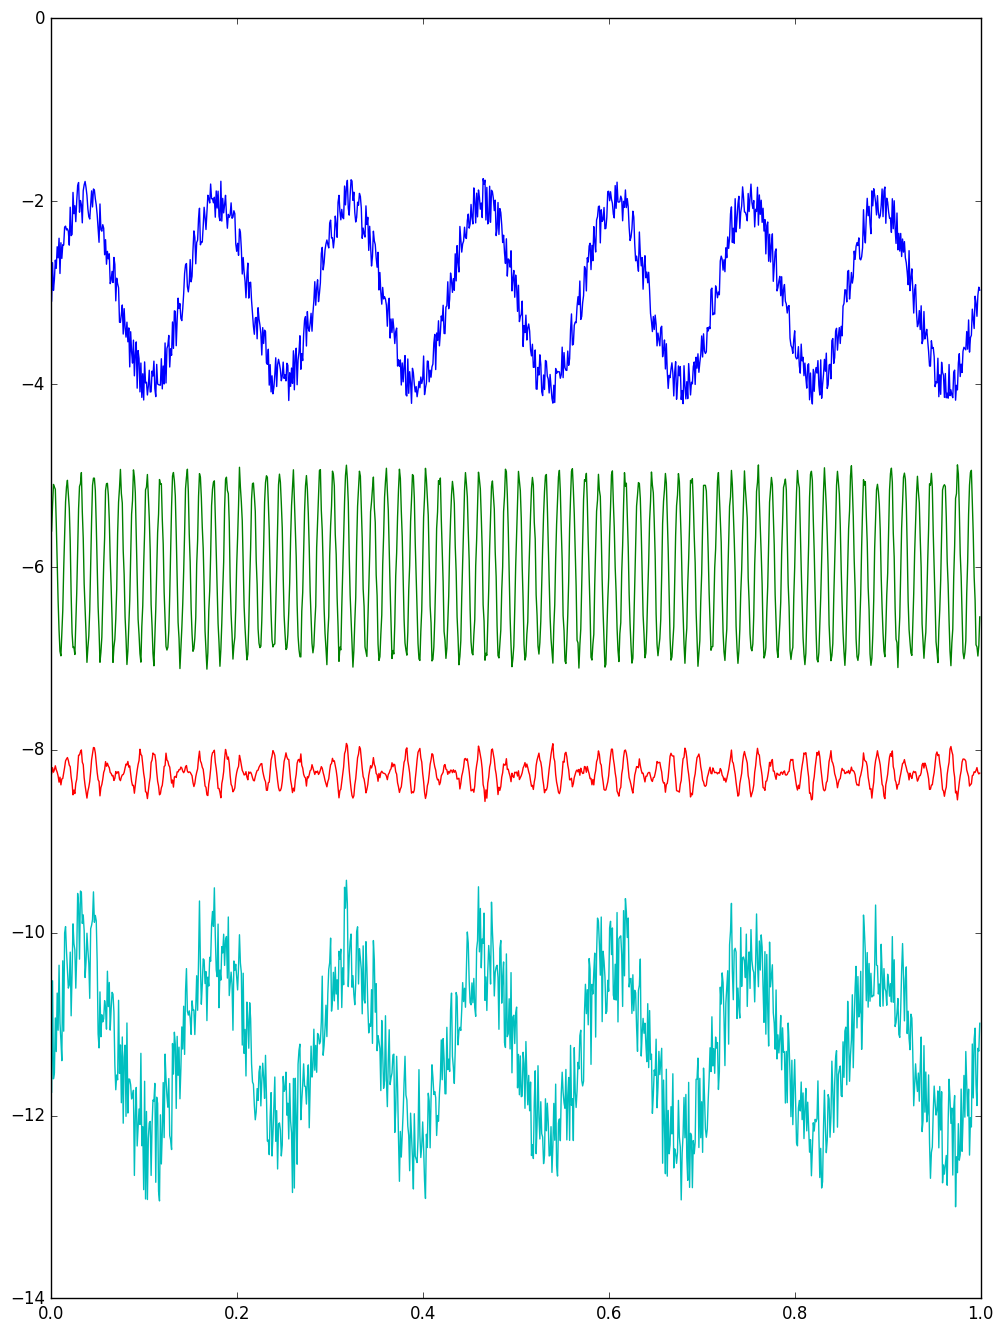

In [121]:
toplot = [theta gamma thetaModulatedGamma fullsignal];

figure(figsize=(12,16))
for i in 1:size(toplot,2)
    plot(samples[samples.<1],toplot[:,i][samples.<1]-i*3)
end

## Power Spectra

In [ ]:
function plotpsd(fullsignal, samplingrate, maxfreq2plot)
    nsamples = size(fullsignal,1)
    nyquist = samplingrate/2
    frequencies = nyquist/(nsamples/2):nyquist/(nsamples/2):nyquist
    psd = abs(fft(fullsignal))[1:nsamples/2]
    plot(frequencies[frequencies.<maxfreq2plot],psd[frequencies.<maxfreq2plot])
end

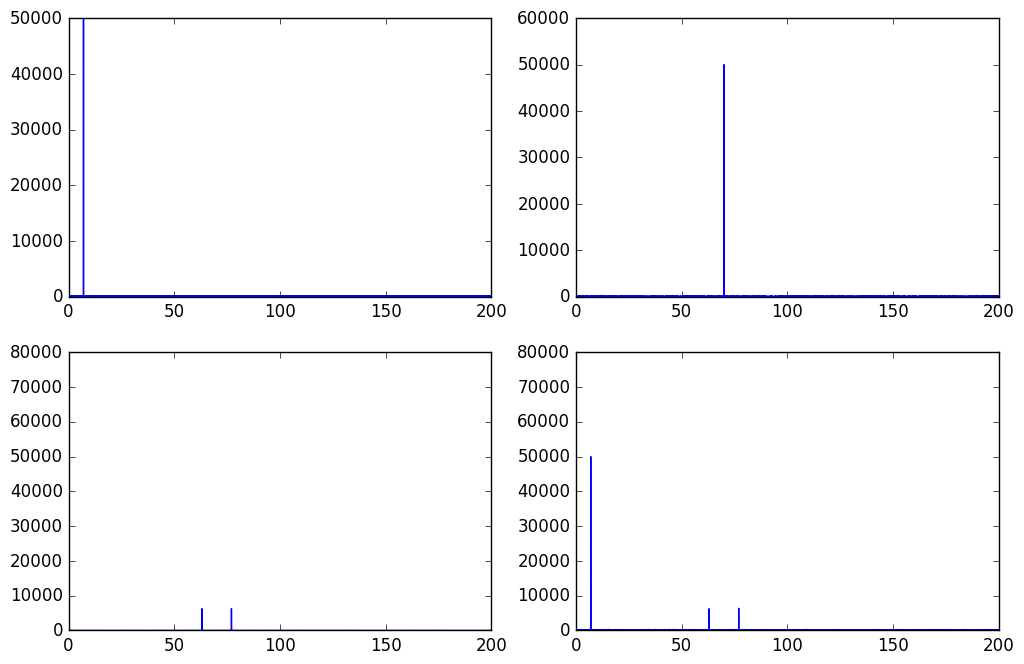

In [129]:
toplot = [theta gamma thetaModulatedGamma fullsignal];

figure(figsize=(12,16))
for i in 1:size(toplot,2)
    subplot(size(toplot,2),2,i)
    plotpsd(toplot[:,i], samplingrate, 200)
end

In [130]:
Pkg.dir("Synchrony")

"/home/data/.julia/v0.4/Synchrony"